## plot distribution of dataset

In [2]:
import os, dill
import json
from scipy import stats
import matplotlib.pyplot as plt
import sys
import glob
import numpy as np
import torch
import torch.nn as nn
import math

sys.path.append('..')

import ptm_recommender.graph_models.graph_util as util
from ptm_recommender.graph_models.gcnn.gin_utils import graph_to_s2vgraphs

torch.set_num_threads(2)
torch.cuda.is_available = lambda : False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


DILL_PATH = '../ptm_model_bench/base_model_dataset/'
MODEL_PATH = '../results/gcnn_ptm_model_bench/'
PERFORMANCE_PATH = '../ptm_model_bench/performance/merged_models/'
OUTPUT_NAME = 'result'

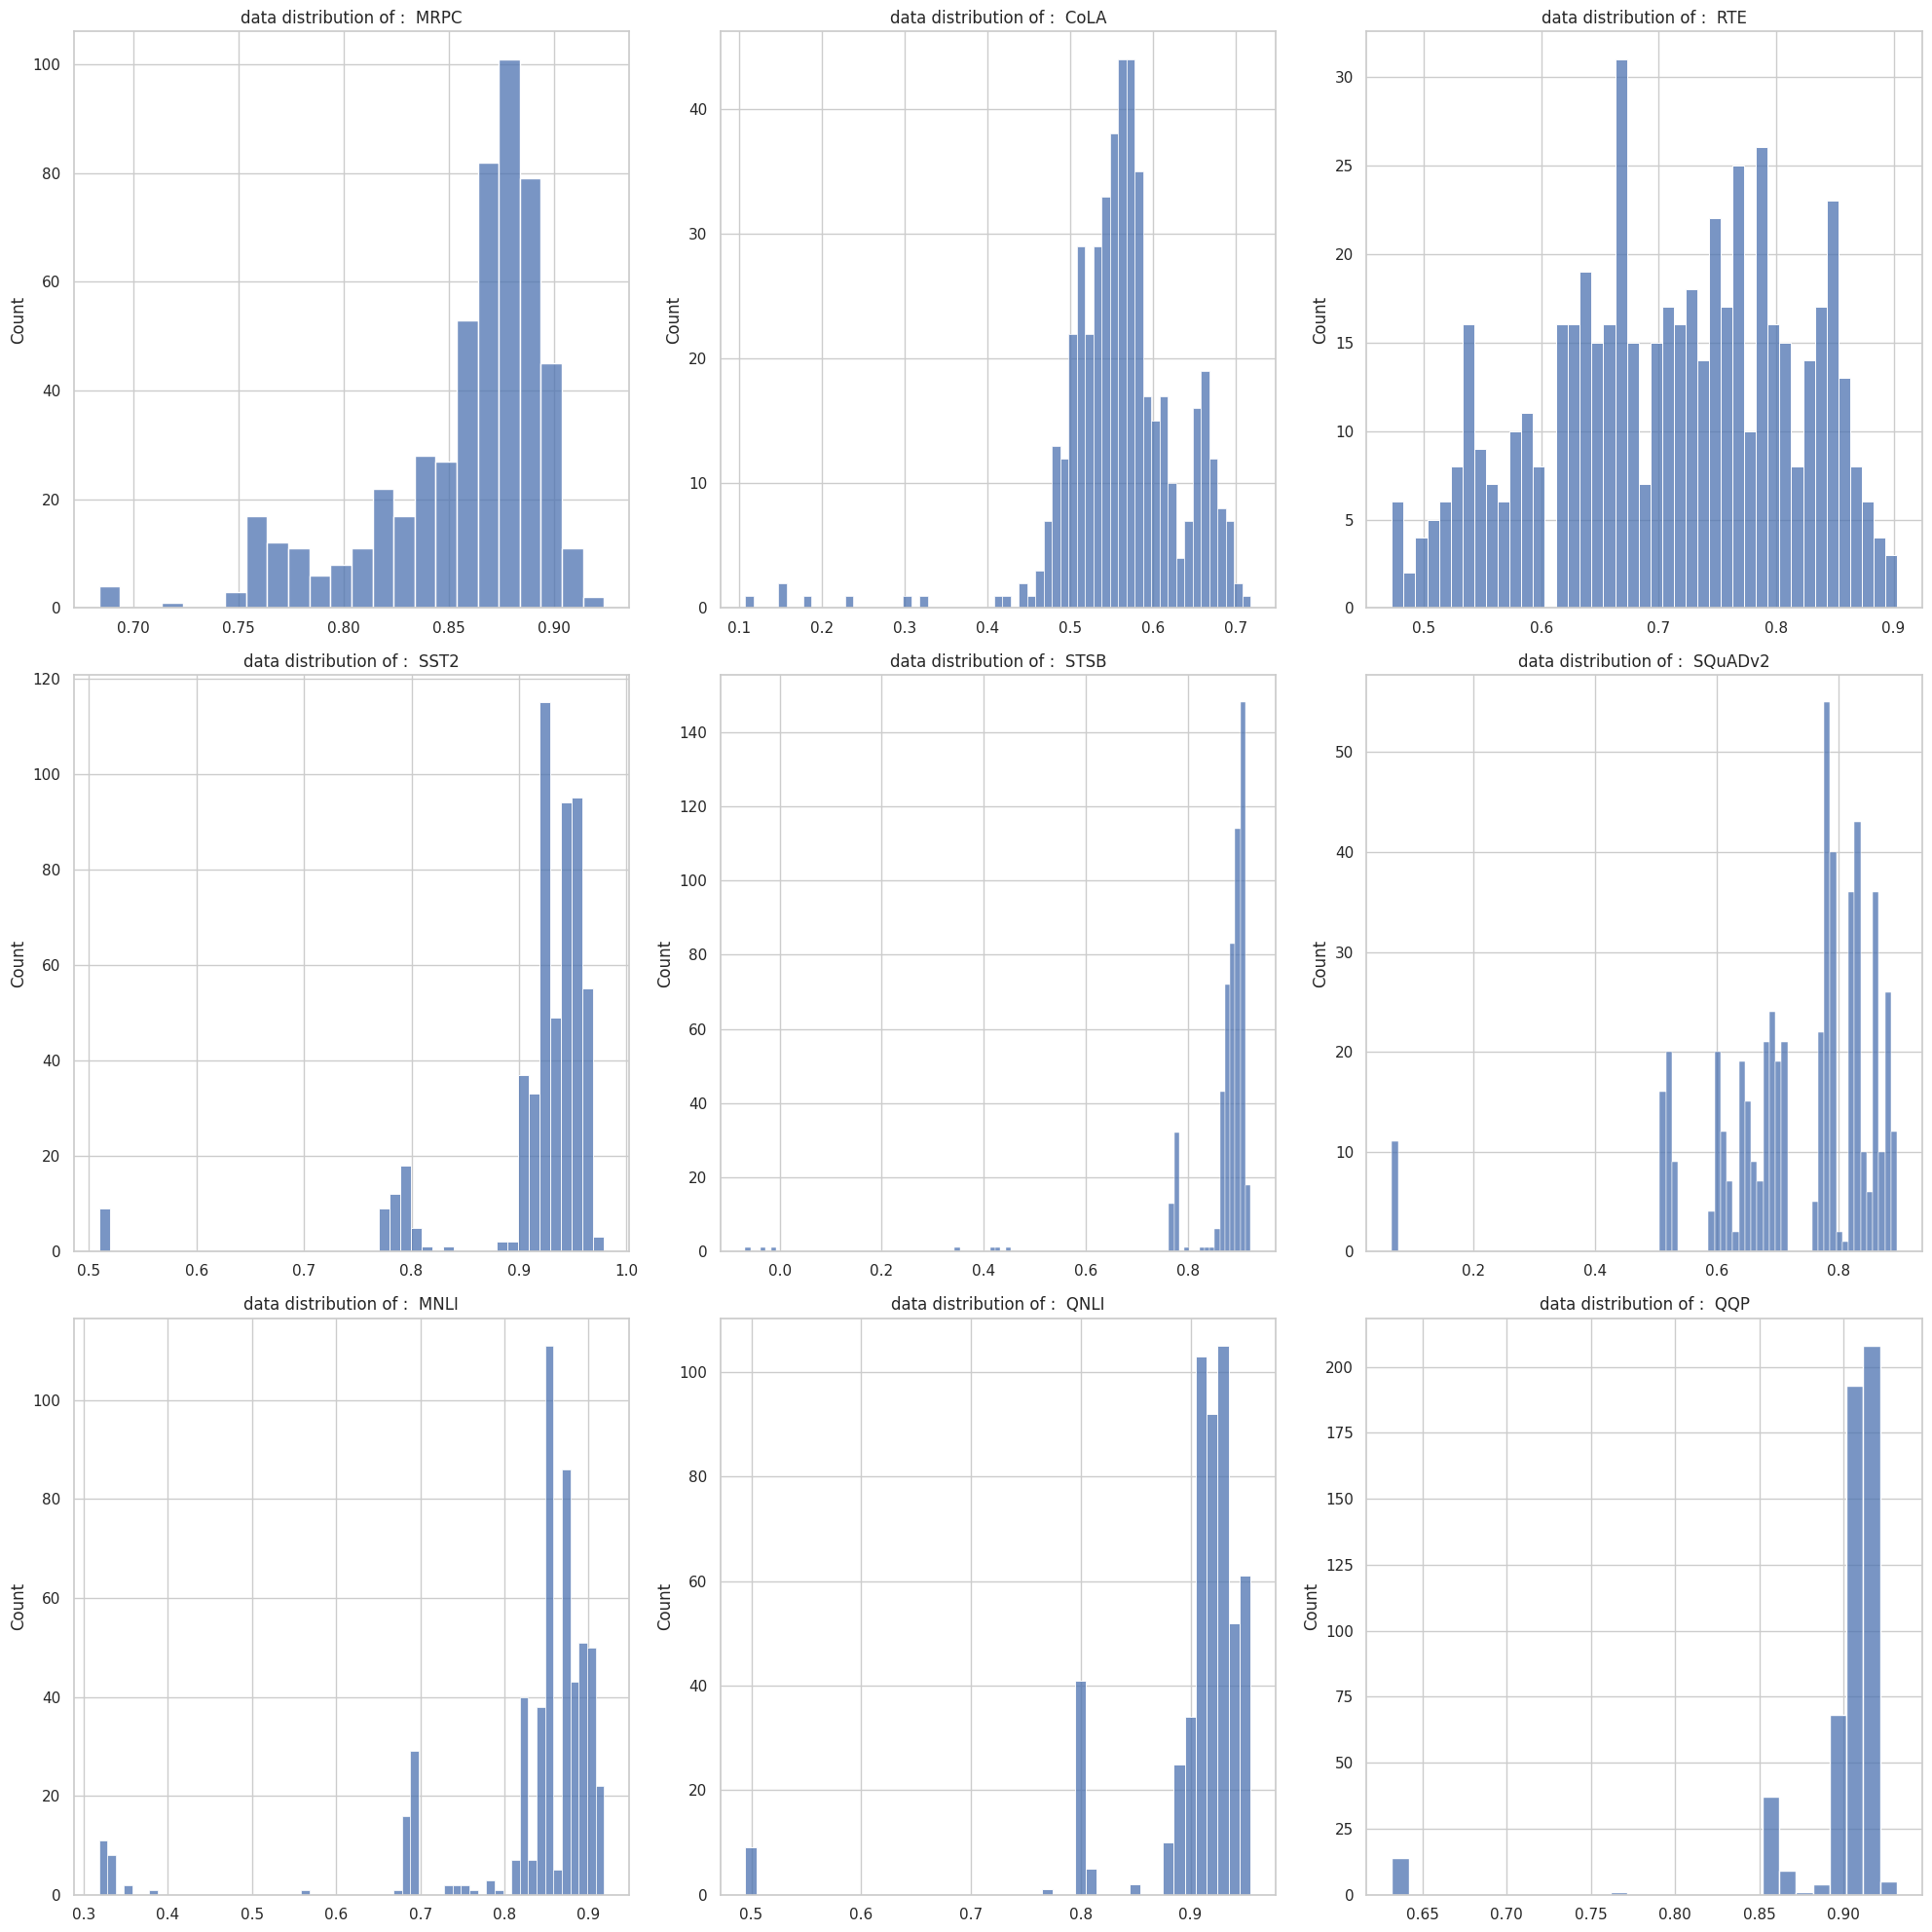

In [37]:
# 각 dataset마다 distribution plot+
import json
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

task_to_metric = {
            "mrpc" : "eval_accuracy",  "cola" : "eval_matthews_correlation", #"cola" : "eval_accuracy",
            "rte" :'eval_accuracy', "sst2" :'eval_accuracy', "stsb" :'eval_pearson',
             "squad_v2": "f1", "mnli": "eval_accuracy", 
            "qnli": "eval_accuracy", "qqp": "eval_accuracy"
}
tasks =task_to_metric.keys()


def load_accuracy(task):
    with open(f'../ptm_model_bench/performance/merged_models/{task}_performance_score.json') as f:
        perf = json.load(f)
    perf_list= [i[task_to_metric[task]]  for k, i in perf[task].items() ]
    if task == 'squad_v2':
        perf_list = [x/100 for x in perf_list]
        
    if task == 'cola':
        perf_list = [x for x in perf_list if x>0.1]
    
    return perf_list


# 동시에 plot됨, 만약 하나씩 보고 싶은면 for loop중 1개만 실행하면 됨
# Set the style for the plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for task, ax in zip(tasks, axes.flat): 
    y=load_accuracy(task)
#         print(f'distribution of {task}..', "length of perf : ", len(y))
    sns.histplot(y, kde = False, ax=ax, binwidth=0.01, label=task).set(
        title="data distribution of :  {}".format(task_title[task]))
plt.tight_layout()
# plt.show()
plt.savefig('dataset_distribution.png', dpi=200)


In [67]:
task_to_metric = {
            "mrpc" : "eval_accuracy",  "cola" : "eval_matthews_correlation", 
            "rte" :'eval_accuracy', "sst2" :'eval_accuracy', "stsb" :'eval_pearson',
            "wnli" :'eval_accuracy', "squad_v2": "f1", "mnli": "eval_accuracy", 
            "qnli": "eval_accuracy", "qqp": "eval_accuracy"
}

base_model_list = [
    "albert-base-v2", 
    "albert-large-v2",
    "bert-base-uncased", 
    "bert-large-uncased", 
    "distilbert-base-uncased",
    "distilroberta-base", 
    "electra-base-discriminator",
    "electra-large-discriminator",
    "roberta-base", 
    "roberta-large",
    "xlm-roberta-base", 
    "xlm-roberta-large"
]


colors = [
    'tab:blue',
    'tab:blue',
    'tab:orange',
    'tab:orange',
    'tab:purple',
    'tab:purple',
    'tab:pink',
    'tab:pink',
    'tab:olive',
    'tab:olive',
    'tab:cyan',
    'tab:cyan'
]
base_model_to_color_hash={
    "albert-base-v2": sns.light_palette('blue', n_colors=5, reverse=False)[2], #'blue',
    "albert-large-v2":sns.light_palette('blue', n_colors=5, reverse=True)[2],
    "bert-base-uncased": 'orange', 
    "bert-large-uncased": sns.light_palette('orange', n_colors=10, reverse=True)[2],
    "distilbert-base-uncased":'purple',
    "distilroberta-base": sns.light_palette('purple', n_colors=10, reverse=True)[2],
    "electra-base-discriminator":'pink', 
    "electra-large-discriminator":sns.light_palette('pink', n_colors=10, reverse=True)[2],
    "roberta-base": 'olive', 
    "roberta-large":sns.light_palette('olive', n_colors=10, reverse=True)[2],
    "xlm-roberta-base": 'cyan', 
    "xlm-roberta-large":sns.light_palette('cyan', n_colors=10, reverse=True)[2],
}

base_model_to_color_hash={
    "albert-base-v2": sns.light_palette('blue', n_colors=10, reverse=True)[8], #'blue',
    "albert-large-v2":sns.light_palette('blue', n_colors=10, reverse=True)[3],
    "bert-base-uncased": sns.light_palette('orange', n_colors=10, reverse=True)[8], 
    "bert-large-uncased": sns.light_palette('orange', n_colors=10, reverse=True)[3],
    "distilbert-base-uncased":sns.light_palette('purple', n_colors=10, reverse=True)[8],
    "distilroberta-base": sns.light_palette('purple', n_colors=10, reverse=True)[3],
    "electra-base-discriminator":sns.light_palette('pink', n_colors=10, reverse=True)[8],
    "electra-large-discriminator":sns.light_palette('pink', n_colors=10, reverse=True)[3],
    "roberta-base": sns.light_palette('olive', n_colors=10, reverse=True)[8],
    "roberta-large":sns.light_palette('olive', n_colors=10, reverse=True)[3],
    "xlm-roberta-base": sns.light_palette('cyan', n_colors=10, reverse=True)[8],
    "xlm-roberta-large":sns.light_palette('cyan', n_colors=10, reverse=True)[3],
}


markers_1 = [
    '.',
    'x',
    '.',
    'x',
    '.',
    'x',
    '.',
    'x',
    '.',
    'x',
    '.',
    'x'
]

markers_2 = [
    'o',
    '^',
    'd',
    '+',
    'x',
    'o',
    '^',
    'd',
    '+',
    'x'
]

# Task for title
task_title = {
    "cola":'CoLA', 
    "mrpc":'MRPC',
    "rte" :'RTE', 
    "sst2" :'SST2', 
    "stsb" :'STSB',
    "wnli" :'WNLI', 
    "squad_v2": 'SQuADv2',
    "mnli": 'MNLI', 
    "qnli": 'QNLI', 
    "qqp": 'QQP'
}

In [68]:
sns.light_palette('blue', n_colors=5, reverse=True)

[(0.0, 0.0, 1.0),
 (0.23662287504432972, 0.23663068481069002, 0.9879517687787489),
 (0.47324575008865943, 0.47326136962138005, 0.9759035375574979),
 (0.7098686251329892, 0.70989205443207, 0.9638553063362468),
 (0.9427942677547513, 0.942825384792593, 0.9519953287278279)]

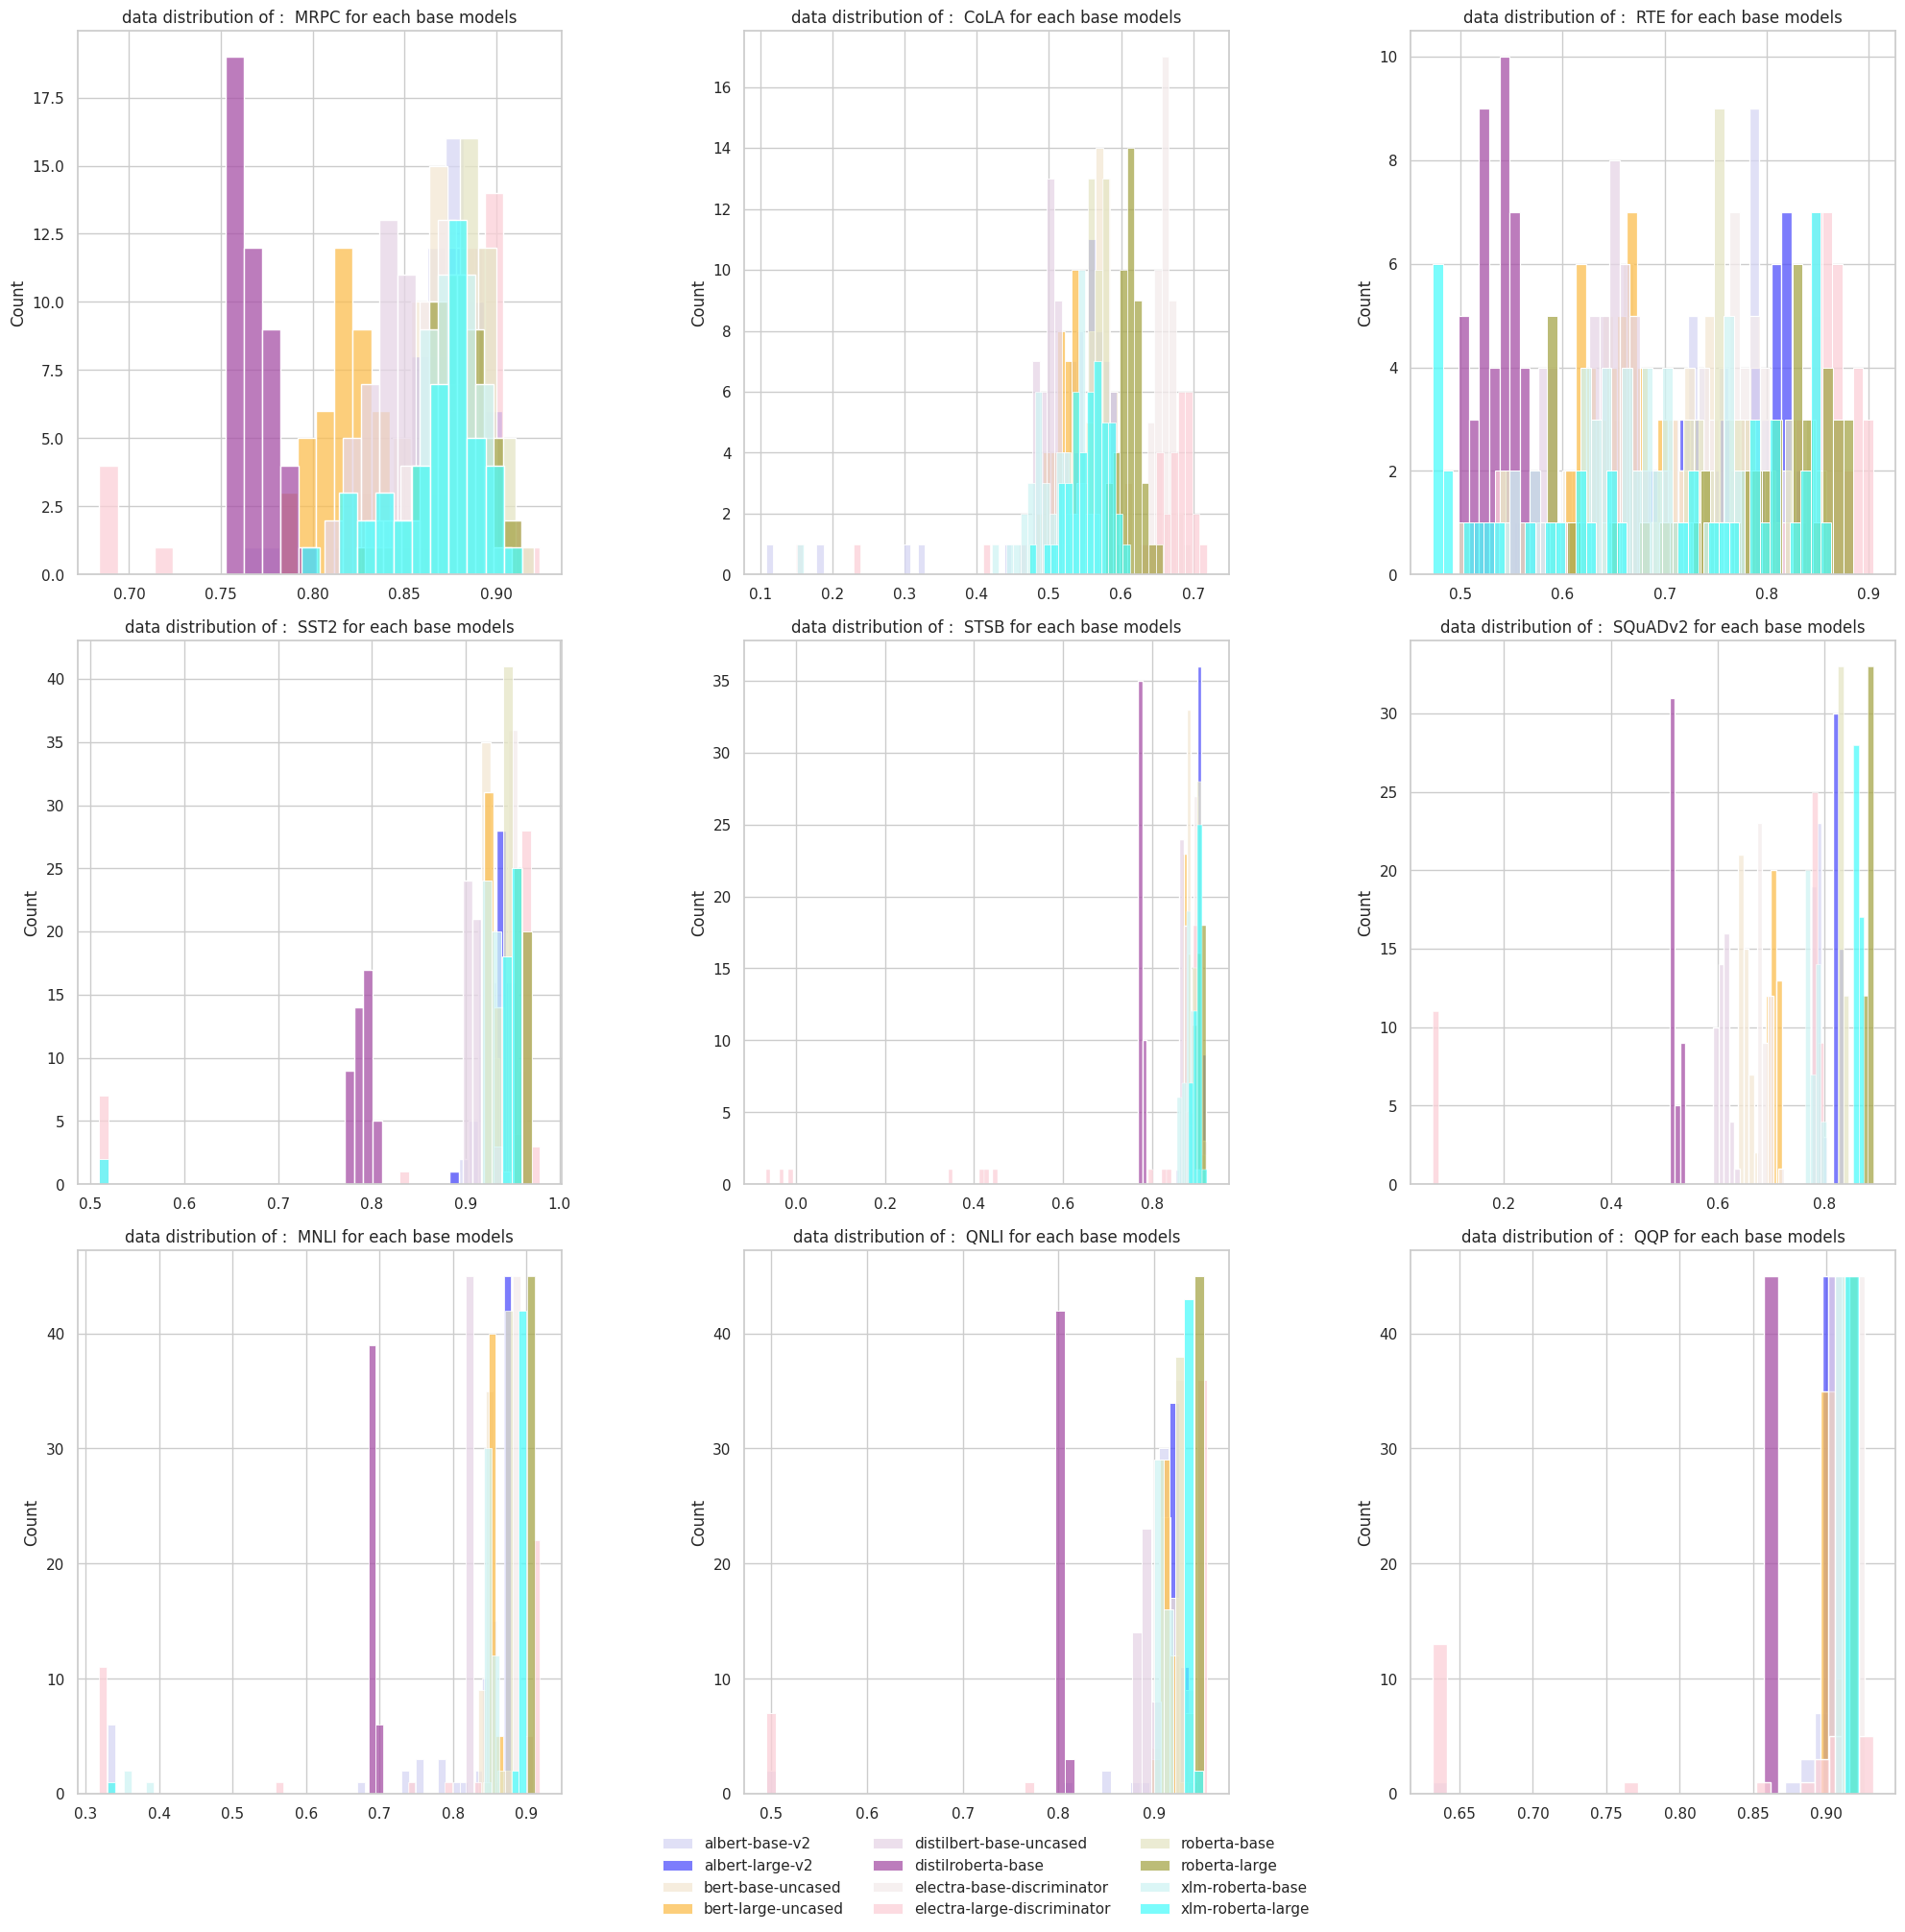

<Figure size 640x480 with 0 Axes>

In [69]:
# 각 dataset마다 distribution plot+
import json
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

task_to_metric = {
            "mrpc" : "eval_accuracy",  "cola" : "eval_matthews_correlation", #"cola" : "eval_accuracy",
            "rte" :'eval_accuracy', "sst2" :'eval_accuracy', "stsb" :'eval_pearson',
             "squad_v2": "f1", "mnli": "eval_accuracy", 
            "qnli": "eval_accuracy", "qqp": "eval_accuracy"
}
tasks =task_to_metric.keys()


def load_accuracy_for_base_model(task, base_model):
    with open(f'../ptm_model_bench/performance/merged_models/{task}_performance_score.json') as f:
        perf = json.load(f)
    perf_list= [i[task_to_metric[task]]  for k, i in perf[task].items() if k.split('_')[0] == base_model]
    if task == 'squad_v2':
        perf_list = [x/100 for x in perf_list]
    if task == 'cola':
        perf_list = [x for x in perf_list if x>0.1]
    return perf_list



# Set the style for the plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for tdx, (task, ax) in enumerate(zip(tasks, axes.flat)): 
    dist ={}
    colors={}
    hatches={}
    for idx, base_model in enumerate(base_model_list):
        y=load_accuracy_for_base_model(task, base_model)
        dist[base_model] = y
        colors[base_model] = base_model_to_color_hash[base_model]
        if idx == len(base_model_list) -1:
            sns.histplot(y, kde = False, ax=ax, binwidth=0.01, 
                             color=colors[base_model],
                        label=base_model).set(
            title="data distribution of :  {} for each base models".format(task_title[task]))
        else:
            sns.histplot(y, kde = False, ax=ax, binwidth=0.01, 
                             color=colors[base_model],
                        label=base_model)
        ax.legend()

#         axes = sns.histplot(dist,kde=False,ax=ax,)
        
    if tdx == len(tasks)-2:
#         legend = axes.legend(ncol=6, loc='lower center', bbox_to_anchor=(-1.3, -0.4), borderaxespad=0., fontsize=13)        
        
        sns.move_legend(
                ax, "lower center",
                bbox_to_anchor=(.5, -0.25), ncol=3, title=None, frameon=False,
            )
    else:
        ax.legend().remove()
# sns.move_legend(axe, "lower center")
# plt.annotate('', xy=(-3.6, -0.16), xycoords='axes fraction', xytext=(-2.6, -0.16), arrowprops=dict(arrowstyle="<-", color='black'))
plt.tight_layout()
plt.show()
plt.savefig('dataset_distribution_for_each_base_model.png', dpi=200)

In [ ]:
tasks